# SALES ANALYSIS (ELECTRONIC PURCHASES)

In this Project we use Python Pandas & Python Matplotlib to analyze and answer business questions about 12 months worth of sales data. The data contains hundreds of thousands of electronics store purchases broken down by month, product type, cost, purchase address, etc.

We start by cleaning our data. Tasks during this section include:

- Drop NaN values from DataFrame
- Removing rows based on a condition
- Change the type of columns (to_numeric, to_datetime, astype)
- Once we have cleaned up our data a bit, we move the data exploration section. In this section we explore 5 high level business questions related to our data:

1. What was the best month for sales? How much was earned that month?
2. What city sold the most product?
3. What time should we display advertisemens to maximize the likelihood of customer’s buying product?
4. What products are most often sold together?
5. What product sold the most? Why do you think it sold the most?

To answer these questions we walk through many different pandas & matplotlib methods. They include:

Concatenating multiple csvs together to create a new DataFrame (pd.concat)
Adding columns
Parsing cells as strings to make new columns (.str)
Using the .apply() method
Using groupby to perform aggregate analysis
Plotting bar charts and lines graphs to visualize our results
Labeling our graphs

In [1]:
!pip install jovian --upgrade --quiet

In [2]:
import jovian

In [3]:
# Execute this to save new versions of the notebook
jovian.commit(project="sales-analysis")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "siddhartha014/sales-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/siddhartha014/sales-analysis


'https://jovian.ai/siddhartha014/sales-analysis'

In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt

#### Task 1 : Merging 12 months of sales data into a single file

In [5]:
#Firstmethod
'''
Sales_Data = pd.DataFrame()

for file in os.listdir(os.getcwd()) :
    if file.endswith('.csv') :
        Sales_Data = Sales_Data.append(pd.read_csv(file))
        
Sales_Data.to_csv('SALES_DATA.csv' , index = False, header = 0)

'''

"\nSales_Data = pd.DataFrame()\n\nfor file in os.listdir(os.getcwd()) :\n    if file.endswith('.csv') :\n        Sales_Data = Sales_Data.append(pd.read_csv(file))\n        \nSales_Data.to_csv('SALES_DATA.csv' , index = False, header = 0)\n\n"

In [6]:
#Second Method

files = [file for file in os.listdir('./Sales_Data')]

all_months_data = pd.DataFrame()

for file in files :
    df = pd.read_csv('./Sales_Data/'+ file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv("all_data.csv", index = False)

#### Reading Updated DataFrame

In [7]:
all_data = pd.read_csv("all_data.csv")

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"


#### Clean up the data

##### Drop rows of NAN

In [8]:
# Finding NaN values in the rows
NAN_df = all_data[all_data.isna().any(axis=1)]
NAN_df.head()

# Droping or deleting the NaN values from all the rows
all_data = all_data.dropna(how="all")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"


##### Find 'Or' and delete it

In [9]:
# Finding the string 'Or' in the Order Date column

all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


##### Convert Columns to the correct type

In [10]:
# Converting a string into numerics ( int or float)
# The values in Quantity Ordered and Price Each are strings in data. we have to convert tem into the numerics

all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

#### Argument data with additional columns

#### Task 2 : Add month column

In [11]:
# Adding a month column to the data. 
# Converting month into the numerics from strings using astype.

all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5


#### Task 3: Add a sales column

In [12]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5,11.99
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5,3.84
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5,149.99
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5,11.99
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5,5.98


#### Task 4: Add a City Column

In [13]:
# For selecting the city in the Address we can use apply() function

all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(",")[1] + ' ,' +  x.split(",")[2].split(' ')[1])

all_data

#all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(",")[1])
#all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5,11.99,"New York City ,NY"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5,3.84,"Dallas ,TX"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5,149.99,"New York City ,NY"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5,11.99,"Dallas ,TX"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5,5.98,"Seattle ,WA"
...,...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6,2.99,"Boston ,MA"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6,149.99,"New York City ,NY"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6,11.95,"San Francisco ,CA"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6,11.95,"San Francisco ,CA"


In [14]:
#Another Method foe´r Selecting the city

'''
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(",")[1])
all_data.head()

or

def get_city(address) :
    return address.split(',')[1]
    
all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x))
all_data.head()

'''

'\nall_data[\'City\'] = all_data[\'Purchase Address\'].apply(lambda x: x.split(",")[1])\nall_data.head()\n\nor\n\ndef get_city(address) :\n    return address.split(\',\')[1]\n    \nall_data[\'City\'] = all_data[\'Purchase Address\'].apply(lambda x: get_city(x))\nall_data.head()\n\n'

### Question 1: What was the best month for sales? How much was earned that month ?

In [15]:
# we can do this by using the groupby function

Monthly_Sales = all_data.groupby('Month').sum()

# looking data by sorting from highest to lowest sales
Best_Month_Sales = Monthly_Sales.sort_values(['Sales'], ascending = False)
Best_Month_Sales

,Quantity Ordered,Price Each,Sales
Month,,,
12,28114,4588415.41,4613443.34
10,22703,3715554.83,3736726.88
4,20558,3367671.02,3390670.24
11,19798,3180600.68,3199603.20
5,18667,3135125.13,3152606.75
3,17005,2791207.83,2807100.38
7,16072,2632539.56,2647775.76
6,15253,2562025.61,2577802.26
8,13448,2230345.42,2244467.88


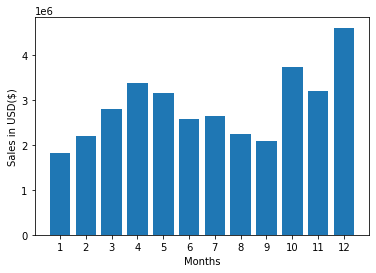

In [16]:
# plotting the results of the above question

import matplotlib.pyplot as plt

months = range(1,13)
 
plt.bar(months,Monthly_Sales['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD($)')
plt.xlabel('Months')
plt.show()

### Question 2 :What city had the highest number of Sales

In [17]:
City_Sales = all_data.groupby('City').sum()
Highest_Sales = City_Sales.sort_values('Sales', ascending = False)
Highest_Sales

,Quantity Ordered,Price Each,Month,Sales
City,,,,
"San Francisco ,CA",50239,8211461.74,315520,8262203.91
"Los Angeles ,CA",33289,5421435.23,208325,5452570.80
"New York City ,NY",27932,4635370.83,175741,4664317.43
"Boston ,MA",22528,3637409.77,141112,3661642.01
"Atlanta ,GA",16602,2779908.20,104794,2795498.58
"Dallas ,TX",16730,2752627.82,104620,2767975.40
"Seattle ,WA",16553,2733296.01,104941,2747755.48
"Portland ,OR",11303,1860558.22,70621,1870732.34
"Austin ,TX",11153,1809873.61,69829,1819581.75


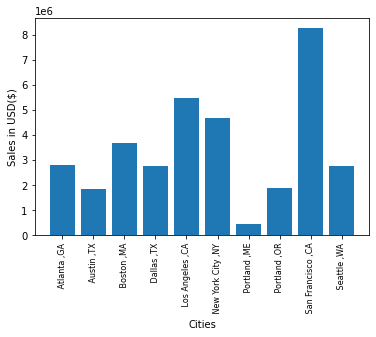

In [18]:
# plotting the results of the above question

import matplotlib.pyplot as plt

City = [city for city, City_Sales in all_data.groupby('City')]
 
plt.bar(City,City_Sales['Sales'])
plt.xticks(City, rotation = 'vertical', size = 8 )
plt.ylabel('Sales in USD($)')
plt.xlabel('Cities')
plt.show()

### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [19]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5,11.99,"New York City ,NY"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5,3.84,"Dallas ,TX"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5,149.99,"New York City ,NY"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5,11.99,"Dallas ,TX"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5,5.98,"Seattle ,WA"


In [26]:
all_data['Hour'] = pd.to_datetime(all_data['Order Date'], infer_datetime_format=True).dt.hour
all_data['Minutes'] = pd.to_datetime(all_data['Order Date'], infer_datetime_format=True).dt.minute
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minutes
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5,11.99,"New York City ,NY",17,14
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5,3.84,"Dallas ,TX",14,43
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5,149.99,"New York City ,NY",11,36
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5,11.99,"Dallas ,TX",20,40
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5,5.98,"Seattle ,WA",22,55
...,...,...,...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6,2.99,"Boston ,MA",19,2
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6,149.99,"New York City ,NY",19,29
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6,11.95,"San Francisco ,CA",18,57
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6,11.95,"San Francisco ,CA",18,35


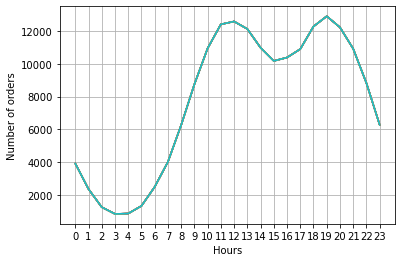

In [27]:
hours = [hour for hour, df in all_data.groupby('Hour')]
 
plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number of orders')
plt.grid()
plt.show()

### Question 4 : What products are most often sold together?

In [31]:
products = all_data[all_data['Order ID'].duplicated(keep = False)]
products['Grouped'] = products.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))

/tmp/ipykernel_36/79699273.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products['Grouped'] = products.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))


In [32]:
products = products[['Order ID', 'Grouped']].drop_duplicates()
products

,Order ID,Grouped
15,194110,"Google Phone,Wired Headphones"
77,194170,"Google Phone,USB-C Charging Cable"
82,194174,"iPhone,Lightning Charging Cable,Wired Headphones"
89,194179,"Flatscreen TV,AAA Batteries (4-pack)"
103,194192,"Wired Headphones,Bose SoundSport Headphones"
...,...,...
186798,222863,"27in FHD Monitor,Bose SoundSport Headphones"
186804,222868,"iPhone,Apple Airpods Headphones"
186819,222882,"Apple Airpods Headphones,AA Batteries (4-pack)"
186822,222884,"Google Phone,USB-C Charging Cable"


In [33]:
from itertools import combinations
from collections import Counter

count = Counter()
for row in products['Grouped'] :
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

### Question 5: What products sold the most? Why do you think it sold the most?

In [34]:
all_data.head()
product_group = all_data.groupby('Product').sum()
product_group.sort_values('Quantity Ordered', ascending = False)

,Quantity Ordered,Price Each,Month,Sales,Hour,Minutes
Product,,,,,,
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039
USB-C Charging Cable,23975,261740.85,154819,286501.25,314645,647586
Lightning Charging Cable,23217,323787.10,153092,347094.15,312529,634442
Wired Headphones,20557,226395.18,133397,246478.43,271720,554023
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304,455570
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445,392603
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948
iPhone,6849,4789400.00,47941,4794300.00,98657,201688


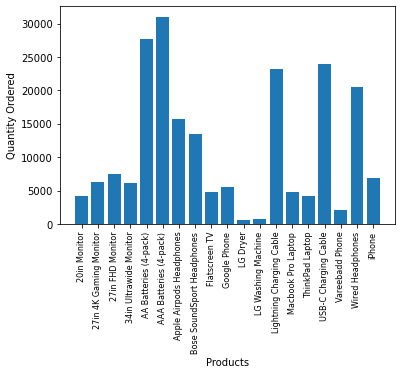

In [35]:
product_group = all_data.groupby('Product')
quantity_group = product_group.sum()['Quantity Ordered']
product = [item for item, products in product_group]
 
plt.bar(product,quantity_group)
plt.xticks(product, rotation = 'vertical', size = 8 )
plt.ylabel('Quantity Ordered')
plt.xlabel('Products')
plt.show()

In [ ]:
jovian.commit(project="sales-analysis")

<IPython.core.display.Javascript object>